# sr-oracle

Evaluate several oracular schemes for set-localization / speculative replacement.

3/4/2024

In [1]:
from collections import defaultdict
from importlib import reload
import json
import os
import sys
from typing import Dict, List, Optional

from matplotlib import colormaps
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath("../../"))
from plot_utils import collate, plot
from naboo_utils import table, file

In [41]:
sim_dir = "/u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_3200"
baseline_study = "baseline"
baseline_experiment = "_baseline"

mix_file = "/u/cmolder/GitHub/ChampSim-2022/external/naboo/conf/mixes.toml"
benchmark_file = "/u/cmolder/GitHub/ChampSim-2022/external/naboo/conf/benchmarks.toml"
suite_file = "/u/cmolder/GitHub/ChampSim-2022/external/naboo/conf/suites.toml"

suites = [
    "spec06",
    "spec17",
    "gap",
    "google"
]
dpi = 192

os.makedirs("temporal_oracle/access_miss", exist_ok=True)
os.makedirs("temporal_oracle/access_nocold", exist_ok=True)
os.makedirs("perfect", exist_ok=True)

In [9]:
studies = {
    "temporal_oracle": collate.StudyCollator(sim_dir, "temporal_oracle",
                                             mix_file, benchmark_file, suite_file,
                                             baseline_study=baseline_study,
                                             baseline_experiment=baseline_experiment),
    "perfect": collate.StudyCollator(sim_dir, "perfect",
                                     mix_file, benchmark_file, suite_file,
                                     baseline_study=baseline_study,
                                     baseline_experiment=baseline_experiment)
}

~~~ temporal_oracle ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 768/768 [00:04<00:00, 168.26file/s]


[ipykernel_launcher][angrist-3] Collating study files...

~~~ perfect ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 96/96 [00:01<00:00, 81.17file/s] 


[ipykernel_launcher][angrist-3] Collating study files...



# Stream
## Access, all misses

In [16]:
stream_df = {
    # Single global stream
    "Global": studies["temporal_oracle"]["temporal_oracle_global_cache_1"],
    # PC-localized stream
    "PC": studies["temporal_oracle"]["temporal_oracle_pc_cache_1"],
    # Set-localized stream
    "Set": studies["temporal_oracle"]["temporal_oracle_global_set_1"],
    # PC+Set-localized stream
    "PC+Set": studies["temporal_oracle"]["temporal_oracle_pc_set_1"],
    # Perfect
    # "Perfect": studies["perfect"]["llc_perfect"],
}

stream_colors = defaultdict(lambda: None, {
    "Global": colormaps["Greens"](0.45),
    "PC": colormaps["Blues"](0.45),
    "Set": colormaps["Oranges"](0.45),
    "PC+Set": colormaps["Purples"](0.45),
    "Perfect": colormaps["Reds"](0.45),
})

stream_hatches = defaultdict(lambda: None, {})
stream_legend_kwargs = {
    "ncol": 4,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
stream_label_kwargs = {
    "rotation": 0,
    "ha": "center",
    "fontsize": 7,
}

#### IPC improvement

In [17]:
plot.get_suite_table(
    stream_df, "cpu.gmean.ipc_improvement",
    suites=suites, add_mean=True)

,spec06,spec17,gap,google,gmean
Global,17.018469,10.565992,15.447267,10.813312,13.426072
PC,39.378210,26.728737,22.728821,19.985936,26.995030
Set,53.140373,24.685259,30.643564,23.729567,32.545986
PC+Set,14.935986,5.401151,21.255833,-8.571595,7.651799


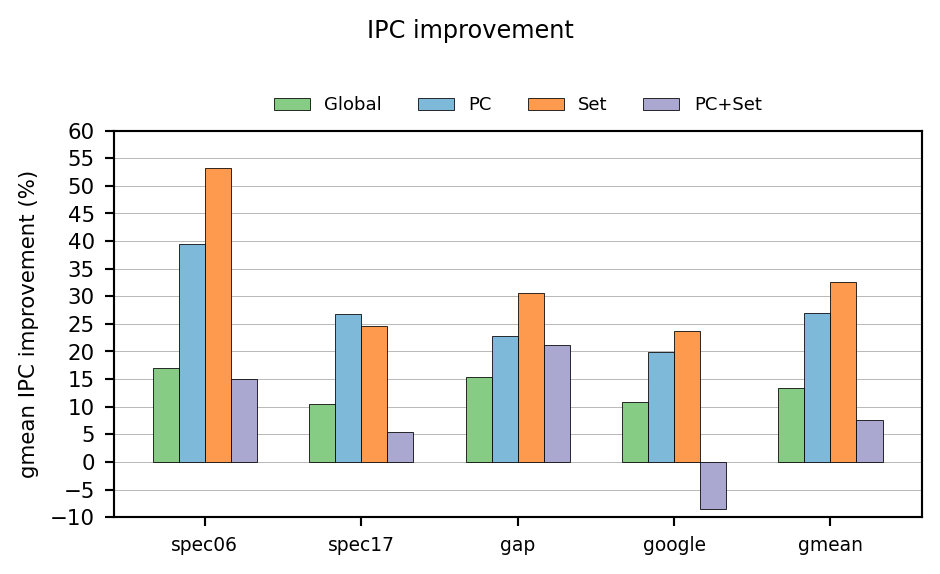

In [19]:
plot.plot_suite_statistic(
    stream_df, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=stream_colors,
    hatches=stream_hatches,
    legend_kwargs=stream_legend_kwargs,
    label_kwargs=stream_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement",
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    ylim=(-10, 60),
    ytick_distance=5,
    dpi=192, figsize=(5, 3))
plt.savefig("temporal_oracle/access_miss/ipc_improvement.png", dpi=dpi, bbox_inches="tight")

##### spec06

In [8]:
plot.get_benchmark_table(stream_df, "spec06", "cpu.gmean.ipc_improvement", add_mean=True)

,GemsFDTD,astar,bwaves,cactusADM,gcc,lbm,leslie3d,libquantum,mcf,milc,omnetpp,soplex,sphinx3,xalancbmk,zeusmp,gmean
Global,3.949441,10.443913,1.725694,1.381386,14.936233,-1.034393,-0.061229,19.043979,18.637315,-0.469869,16.551049,11.536966,6.980290,5.842962,7.078642,7.555924
PC,30.114007,16.213667,13.345422,21.736369,25.956744,32.590235,8.451543,19.065164,41.966335,31.665617,49.348601,35.411547,18.015224,16.728833,11.129414,24.272372
Set,49.216271,15.802372,34.065439,9.532410,30.145890,-8.273087,-0.551142,41.170261,93.990303,15.589667,31.071941,33.866505,12.175845,11.006625,14.500614,23.549220
PC+Set,21.218983,14.678206,42.405728,-15.300088,19.827476,35.978561,-6.399346,41.406754,68.807410,15.379126,-15.442353,-0.179801,-3.763194,0.533974,20.879452,13.800009


[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_1, mix tonto_2049B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_1, mix wrf_1212B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_1, mix hmmer_546B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_1, mix GemsFDTD_109B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_1, mix perlbench_105B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_1, mix calculix_2655B: Missing results for sta

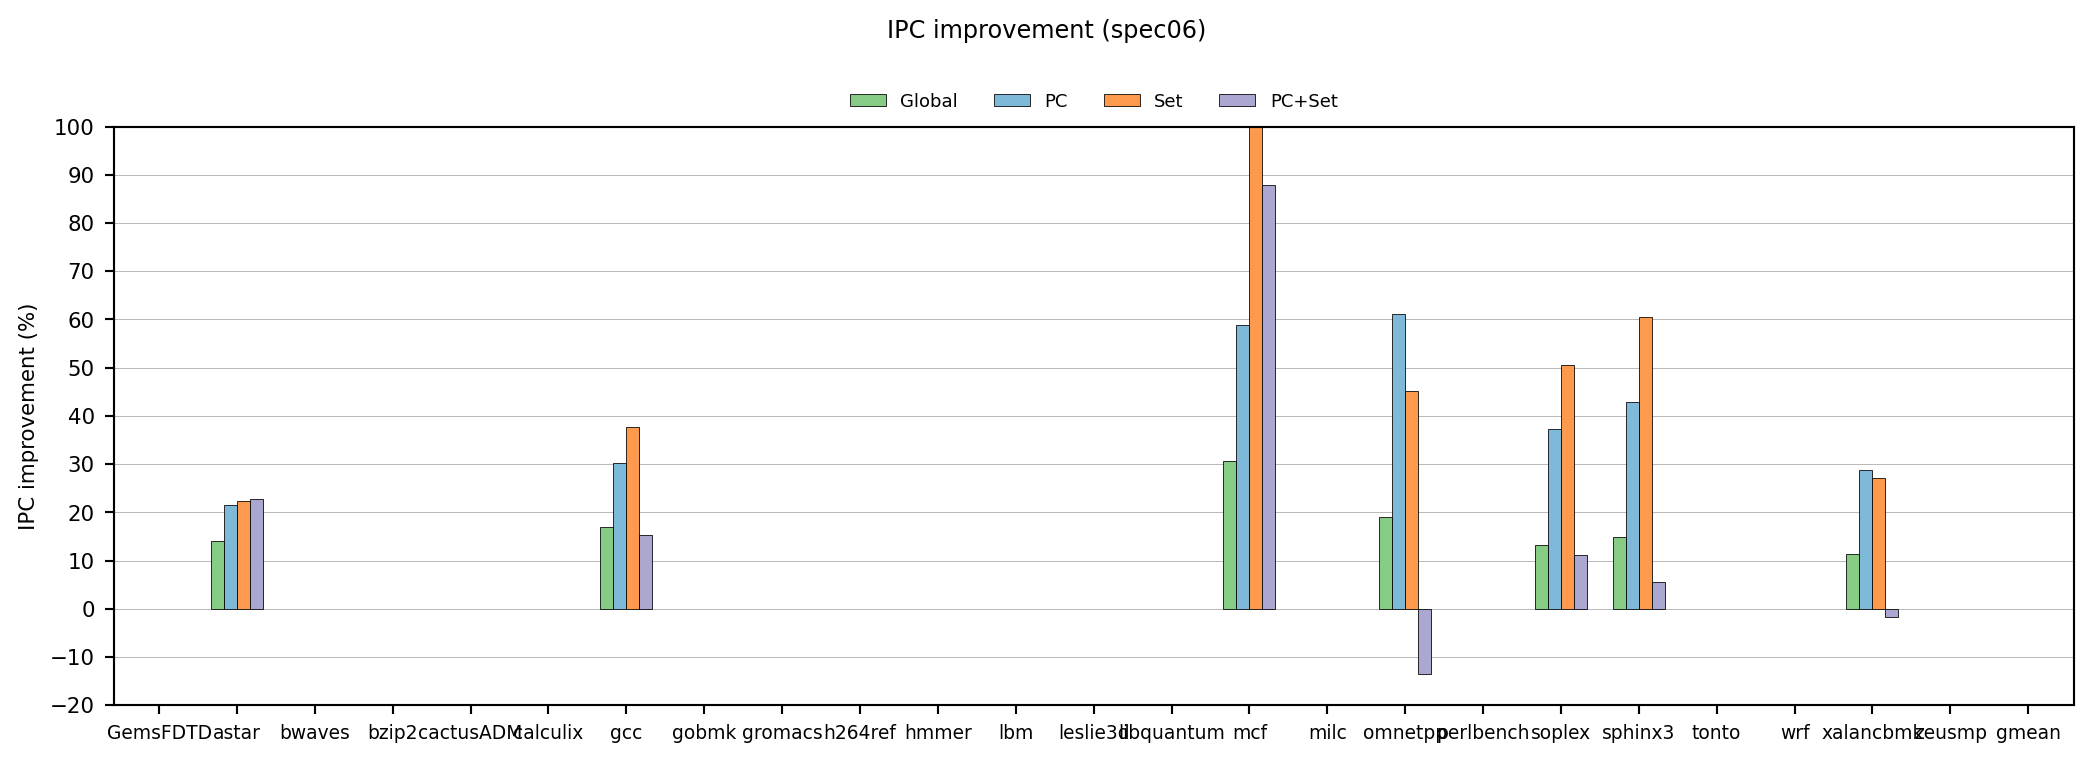

In [20]:
plot.plot_benchmark_statistic(
    stream_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=stream_colors,
    hatches=stream_hatches,
    legend_kwargs=stream_legend_kwargs,
    label_kwargs=stream_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec06)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-20, 100),
    ytick_distance=10,
    dpi=192, figsize=(11, 4))
plt.savefig("temporal_oracle/access_miss/ipc_improvement__spec06.png", dpi=dpi, bbox_inches="tight")

##### spec17

In [10]:
plot.get_benchmark_table(stream_df, "spec17", "cpu.gmean.ipc_improvement", add_mean=True)

,602.gcc,605.mcf,607.cactuBSSN,619.lbm,620.omnetpp,623.xalancbmk,627.cam4,628.pop2,649.fotonik3d,gmean
Global,31.470718,7.286269,1.705352,-0.238652,16.477379,1.349400,0.585259,1.123925,1.725863,6.402370
PC,32.953392,14.478535,26.184986,12.620362,51.613910,4.759730,0.438261,3.520957,13.823443,16.864417
Set,34.204725,24.071873,15.955444,-14.131998,37.268363,2.449744,0.686821,5.262177,9.397547,11.683397
PC+Set,28.041150,17.877812,-20.140235,4.365815,-9.474127,-0.619394,-0.251503,-2.072072,-4.719762,0.578800


[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_1, mix 649.fotonik3d_s-1176B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_1, mix 638.imagick_s-4128B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_1, mix 603.bwaves_s-2931B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_1, mix 627.cam4_s-490B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_1, mix 628.pop2_s-17B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_1, mix 657.xz_s-

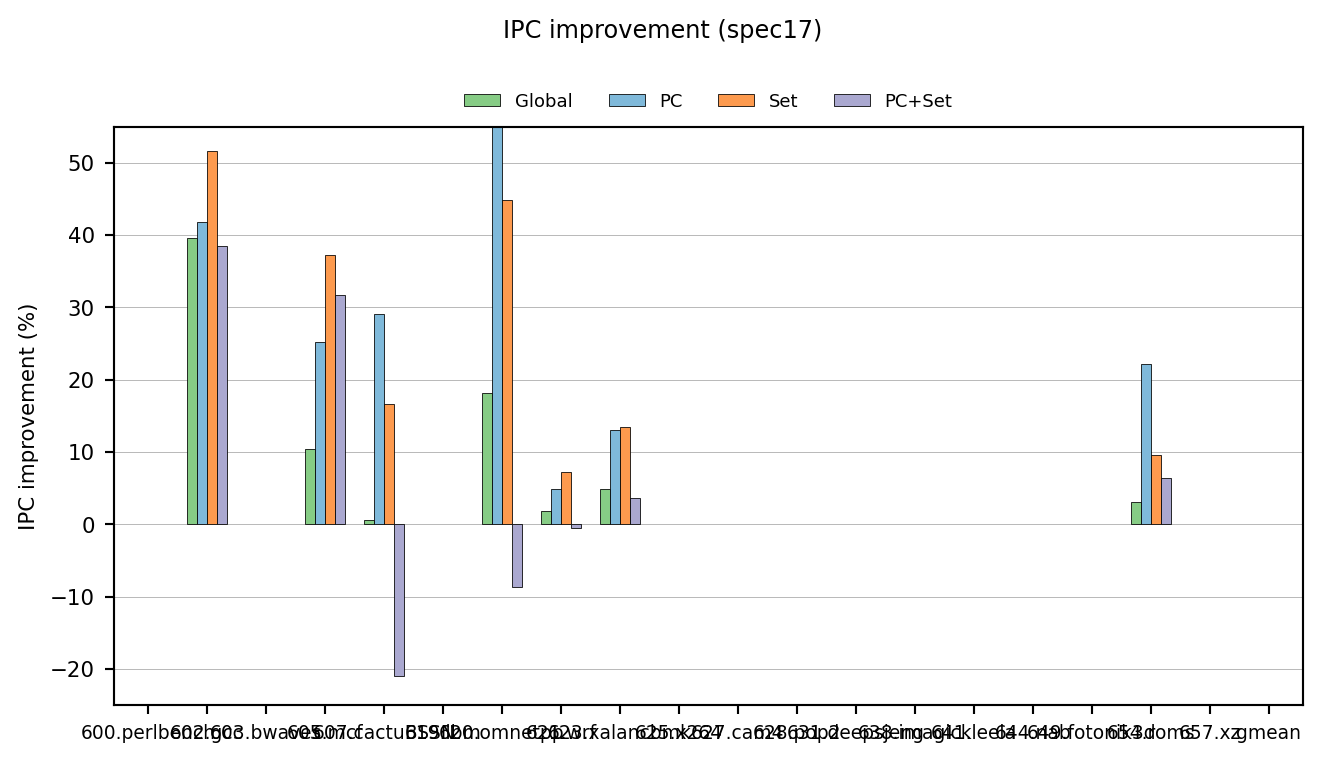

In [21]:
plot.plot_benchmark_statistic(
    stream_df, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=stream_colors,
    hatches=stream_hatches,
    legend_kwargs=stream_legend_kwargs,
    label_kwargs=stream_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec17)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-25, 55),
    ytick_distance=10,
    dpi=192, figsize=(7, 4))
plt.savefig("temporal_oracle/access_miss/ipc_improvement__spec17.png", dpi=dpi, bbox_inches="tight")

##### gap

In [12]:
plot.get_benchmark_table(stream_df, "gap", "cpu.gmean.ipc_improvement", add_mean=True)

,bc,bfs,cc,pr,sssp,tc,gmean
Global,10.933846,12.842038,14.193416,-0.232455,10.621689,5.763673,8.907309
PC,28.329302,19.403075,19.859588,-0.187042,24.650510,7.220698,16.108039
Set,35.726024,19.478626,23.515190,-0.041209,27.717579,5.623374,18.009663
PC+Set,27.147719,13.117242,21.095256,0.107486,26.138778,3.879947,14.763002


[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_1, mix tc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_1, mix bc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_1, mix sssp: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_pc_cache_1, mix tc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_pc_cache_1, mix bc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_pc_cache_1, mix sssp: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launche

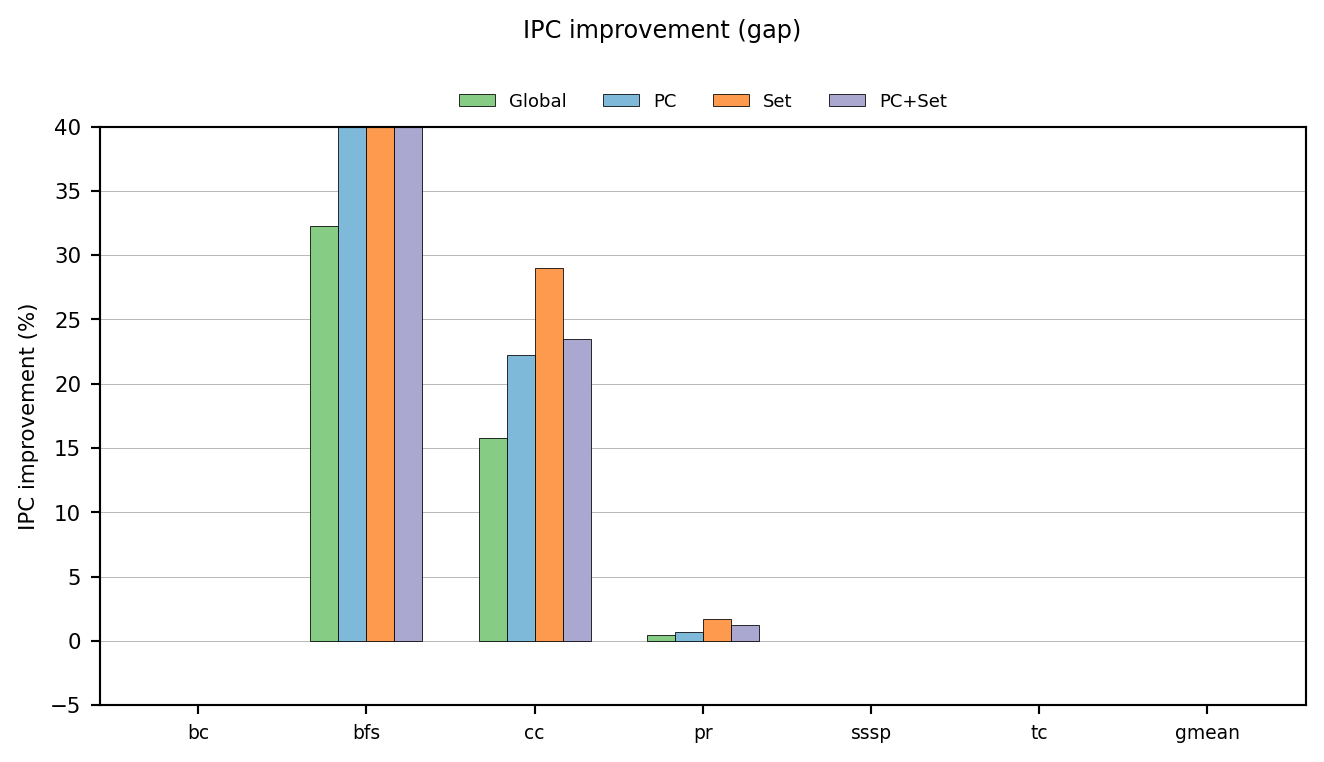

In [22]:
plot.plot_benchmark_statistic(
    stream_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=stream_colors,
    hatches=stream_hatches,
    legend_kwargs=stream_legend_kwargs,
    label_kwargs=stream_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (gap)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-5, 40),
    ytick_distance=5,
    dpi=192, figsize=(7, 4))
plt.savefig("temporal_oracle/access_miss/ipc_improvement__gap.png", dpi=dpi, bbox_inches="tight")

##### google

In [36]:
plot.get_benchmark_table(stream_df, "google", "cpu.gmean.ipc_improvement", add_mean=True)

,charlie,delta,merced,whiskey,gmean
Global,8.674142,10.535853,12.437183,11.642203,10.813312
PC,23.342113,20.616662,10.757130,25.785619,19.985936
Set,16.887052,26.768577,21.078364,30.631951,23.729567
PC+Set,-5.025214,-21.125993,-0.707698,-6.056494,-8.571595


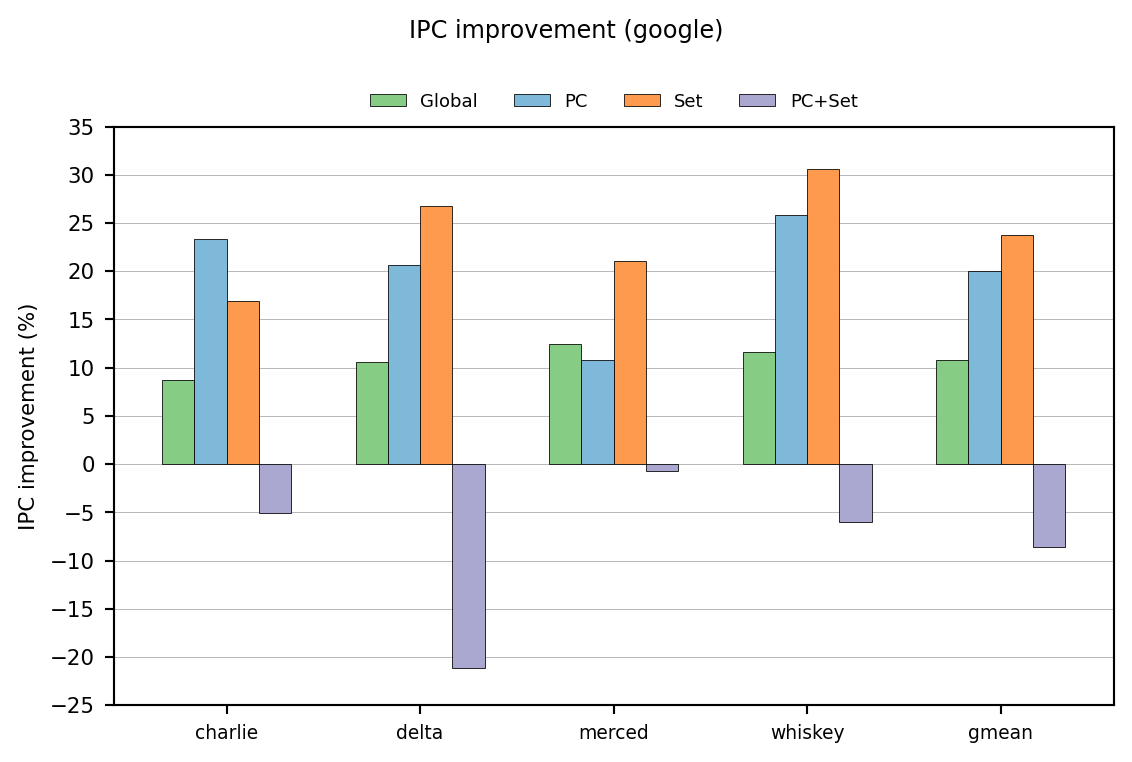

In [38]:
plot.plot_benchmark_statistic(
    stream_df, "google", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=stream_colors,
    hatches=stream_hatches,
    legend_kwargs=stream_legend_kwargs,
    label_kwargs=stream_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (google)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-25, 35),
    ytick_distance=5,
    dpi=192, figsize=(6, 4))
plt.savefig("temporal_oracle/access_miss/ipc_improvement__google.png", dpi=dpi, bbox_inches="tight")

## Access, no cold misses

In [25]:
stream_nocold_df = {
    # Single global stream
    "Global": studies["temporal_oracle"]["temporal_oracle_global_cache_nocold_1"],
    # PC-localized stream
    "PC": studies["temporal_oracle"]["temporal_oracle_pc_cache_nocold_1"],
    # Set-localized stream
    "Set": studies["temporal_oracle"]["temporal_oracle_global_set_nocold_1"],
    # PC+Set-localized stream
    "PC+Set": studies["temporal_oracle"]["temporal_oracle_pc_set_nocold_1"],
    # Perfect
    # "Perfect": studies["perfect"]["llc_perfect_nocold"],
}

stream_nocold_colors = defaultdict(lambda: None, {
    "Global": colormaps["Greens"](0.45),
    "PC": colormaps["Blues"](0.45),
    "Set": colormaps["Oranges"](0.45),
    "PC+Set": colormaps["Purples"](0.45),
    "Perfect": colormaps["Reds"](0.45),
})

stream_nocold_hatches = defaultdict(lambda: None, {})
stream_nocold_legend_kwargs = {
    "ncol": 4,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
stream_nocold_label_kwargs = {
    "rotation": 0,
    "ha": "center",
    "fontsize": 7,
}

#### IPC improvement

In [26]:
plot.get_suite_table(
    stream_nocold_df, "cpu.gmean.ipc_improvement",
    suites=suites, add_mean=True)

,spec06,spec17,gap,google,gmean
Global,14.182367,7.231084,13.969100,5.062605,10.037004
PC,32.330548,16.087809,20.622766,7.672771,18.848984
Set,38.039102,13.943074,26.688481,8.938980,21.381534
PC+Set,9.244309,4.064293,18.557887,-1.307902,7.393587


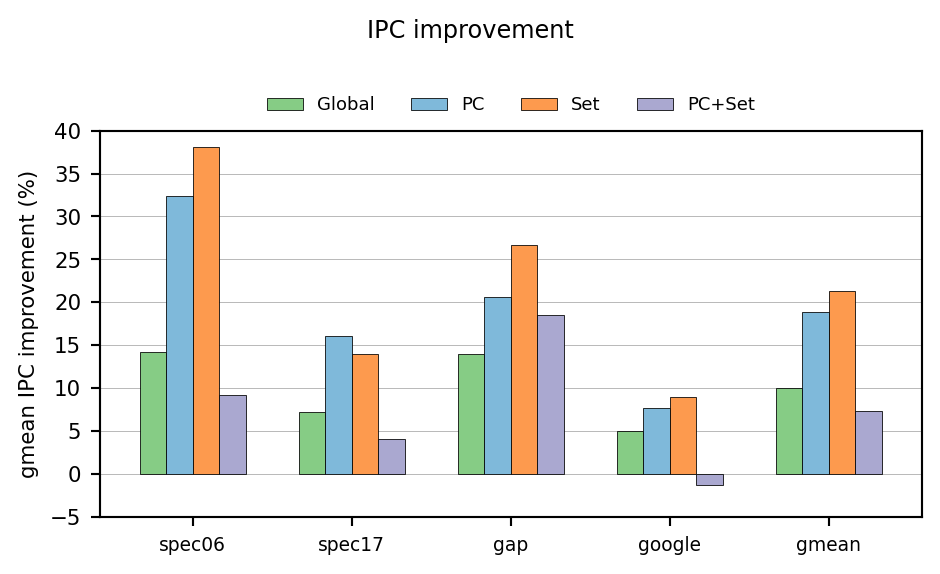

In [64]:
plot.plot_suite_statistic(
    stream_nocold_df, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=stream_nocold_colors,
    hatches=stream_nocold_hatches,
    legend_kwargs=stream_nocold_legend_kwargs,
    label_kwargs=stream_nocold_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement",
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    ylim=(-5, 40),
    ytick_distance=5,
    dpi=192, figsize=(5, 3))
plt.savefig("temporal_oracle/access_nocold/ipc_improvement.png", dpi=dpi, bbox_inches="tight")

##### spec06

In [18]:
plot.get_benchmark_table(stream_nocold_df, "spec06", "cpu.gmean.ipc_improvement", add_mean=True)

,GemsFDTD,astar,bwaves,cactusADM,gcc,lbm,leslie3d,libquantum,mcf,milc,omnetpp,soplex,sphinx3,xalancbmk,zeusmp,gmean
Global,0.237405,8.770211,0.523754,1.991040,11.963983,-0.834154,0.227933,17.419733,11.820506,-0.173186,14.142163,10.569055,6.577151,3.533932,0.173120,5.631265
PC,3.069129,13.284603,1.122567,7.676226,20.655807,0.031017,6.359760,17.273814,26.640937,12.502072,40.172487,32.269972,16.366384,11.294838,0.284961,13.367452
Set,-0.547124,12.777262,0.546115,8.126618,25.445341,-5.000048,-3.229963,36.618570,33.419963,-1.401308,24.539551,30.246282,9.927227,7.236083,0.101622,11.081351
PC+Set,-0.155144,12.437260,1.277176,-4.422579,17.994026,0.087537,-5.466460,35.257110,23.341248,0.976616,-13.597430,-1.284348,-3.966689,-0.578579,0.747022,3.505713


[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_nocold_1, mix tonto_2049B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_nocold_1, mix wrf_1212B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_nocold_1, mix hmmer_546B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_nocold_1, mix GemsFDTD_109B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_nocold_1, mix perlbench_105B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_nocold_1, m

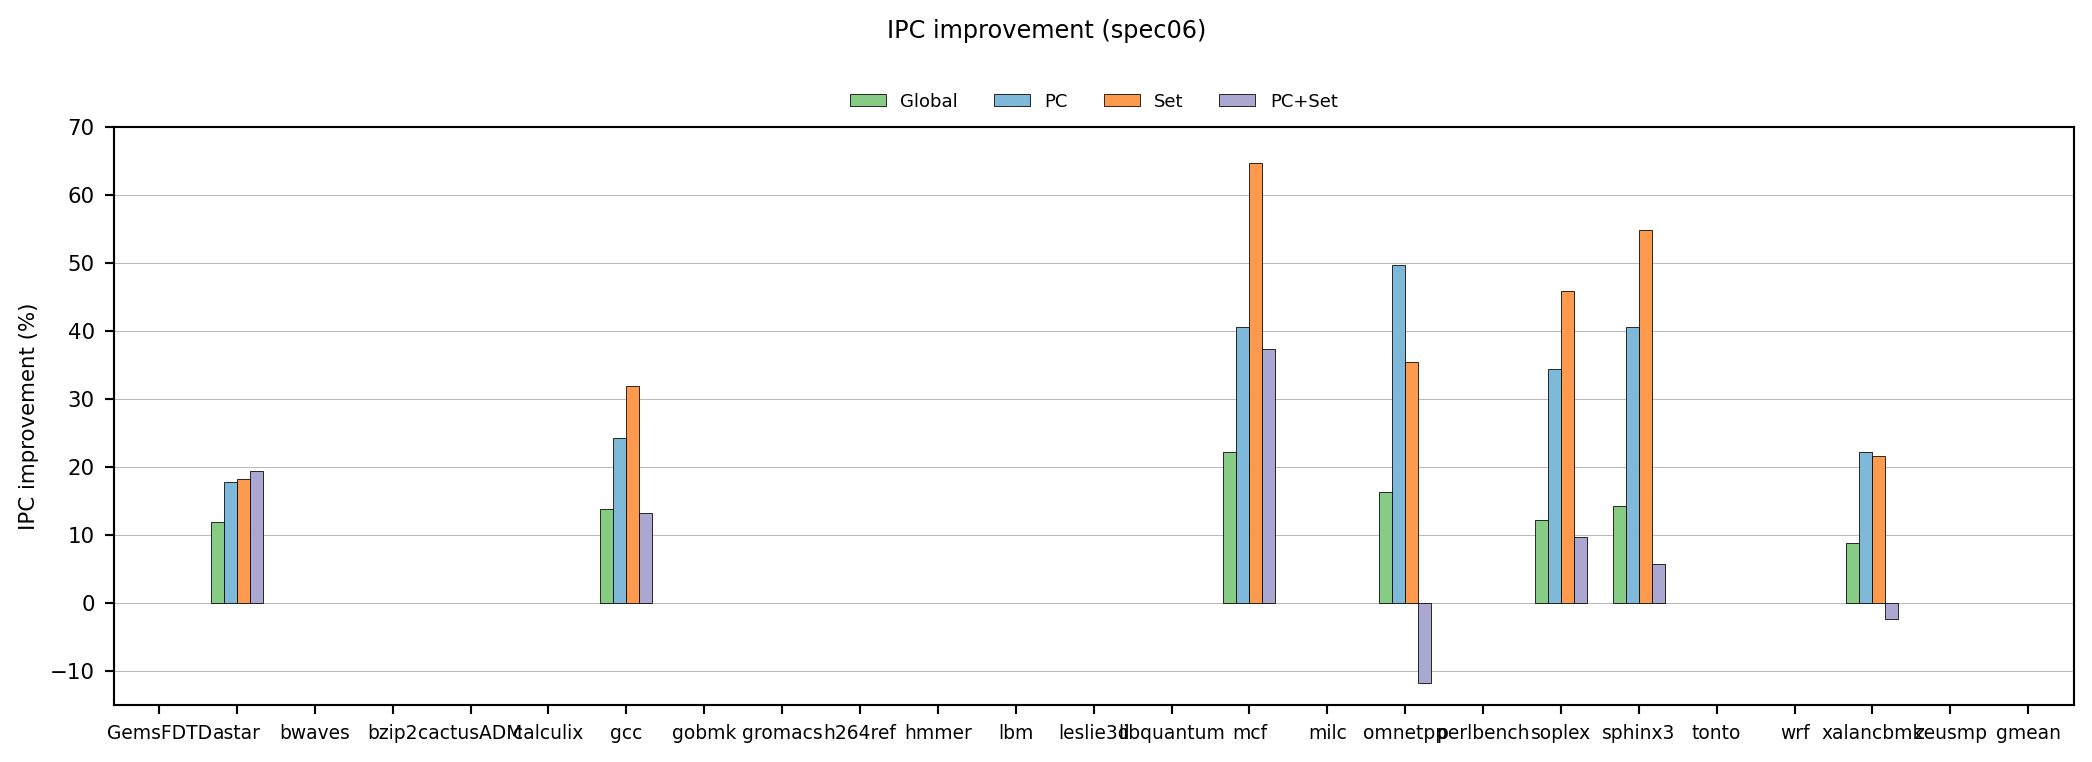

In [63]:
plot.plot_benchmark_statistic(
    stream_nocold_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=stream_nocold_colors,
    hatches=stream_nocold_hatches,
    legend_kwargs=stream_nocold_legend_kwargs,
    label_kwargs=stream_nocold_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec06)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-15, 70),
    ytick_distance=10,
    dpi=192, figsize=(11, 4))
plt.savefig("temporal_oracle/access_nocold/ipc_improvement__spec06.png", dpi=dpi, bbox_inches="tight")

##### spec17

In [20]:
plot.get_benchmark_table(stream_nocold_df, "spec17", "cpu.gmean.ipc_improvement", add_mean=True)

,602.gcc,605.mcf,607.cactuBSSN,619.lbm,620.omnetpp,623.xalancbmk,627.cam4,628.pop2,649.fotonik3d,gmean
Global,18.656010,2.803809,1.119505,-0.286848,12.410582,1.165552,0.311088,1.027295,1.492953,4.123791
PC,19.575080,5.370314,7.066170,0.026066,36.510432,4.011438,0.218257,3.226677,0.134756,7.913859
Set,17.086520,7.759498,4.907253,-10.584561,25.259538,1.980454,0.270550,3.334564,-0.329453,5.074986
PC+Set,14.511738,6.477151,-9.669956,0.011539,-7.455884,-0.826199,-0.148635,-1.613577,1.831516,0.125593


[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_nocold_1, mix 649.fotonik3d_s-1176B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_nocold_1, mix 638.imagick_s-4128B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_nocold_1, mix 603.bwaves_s-2931B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_nocold_1, mix 627.cam4_s-490B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_nocold_1, mix 628.pop2_s-17B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_o

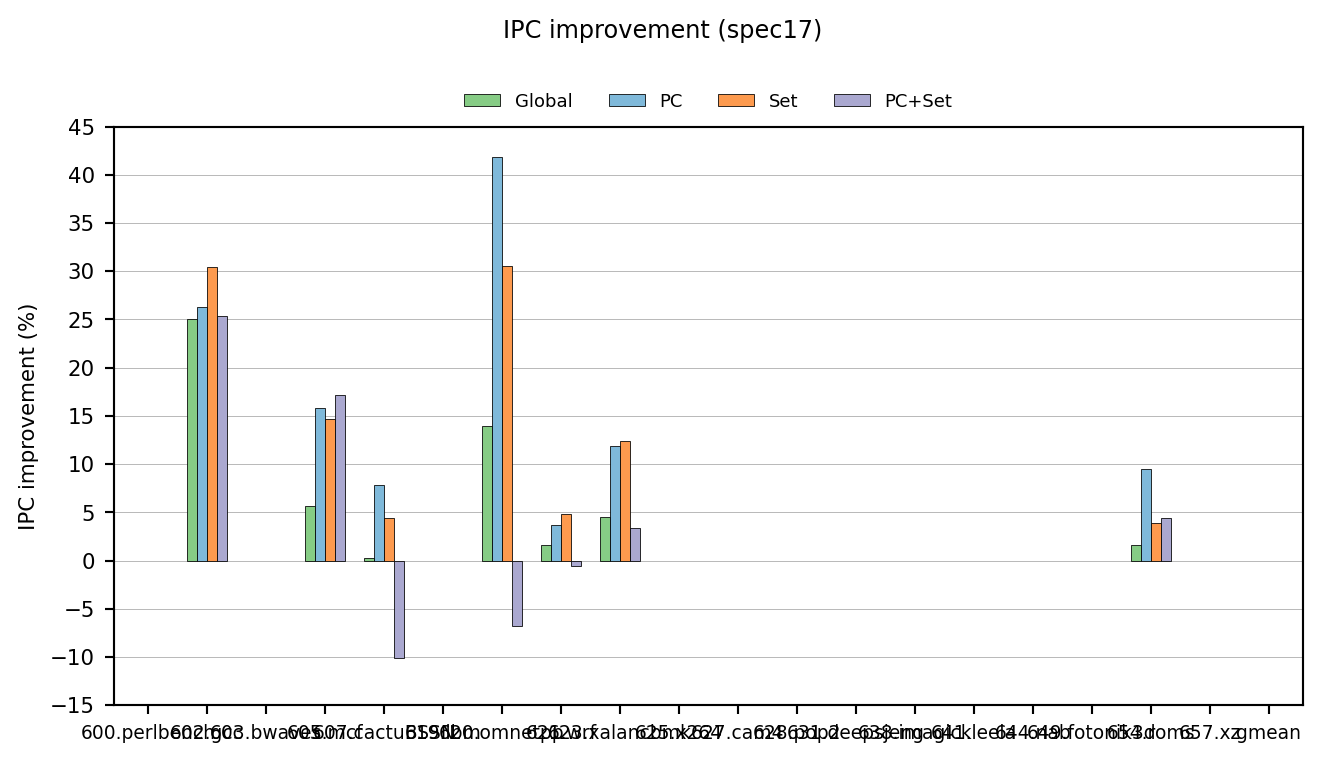

In [62]:
plot.plot_benchmark_statistic(
    stream_nocold_df, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=stream_nocold_colors,
    hatches=stream_nocold_hatches,
    legend_kwargs=stream_nocold_legend_kwargs,
    label_kwargs=stream_nocold_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec17)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-15, 45),
    ytick_distance=5,
    dpi=192, figsize=(7, 4))
plt.savefig("temporal_oracle/access_nocold/ipc_improvement__spec17.png", dpi=dpi, bbox_inches="tight")

##### gap

In [30]:
plot.get_benchmark_table(stream_nocold_df, "gap", "cpu.gmean.ipc_improvement", add_mean=True)

[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_nocold_1, mix tc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_nocold_1, mix bc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_nocold_1, mix sssp: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_pc_cache_nocold_1, mix tc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_pc_cache_nocold_1, mix bc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_pc_cache_nocold_1, mix sssp: Missing results for stat cpu.gmean.ipc_improveme

,bc,bfs,cc,pr,sssp,tc,gmean
Global,NaN,30.321350,13.076182,0.455717,NaN,NaN,NaN
PC,NaN,47.626269,18.030773,0.723071,NaN,NaN,NaN
Set,NaN,62.713660,22.972049,1.620415,NaN,NaN,NaN
PC+Set,NaN,38.255617,19.061323,1.236673,NaN,NaN,NaN


[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_nocold_1, mix tc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_nocold_1, mix bc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_nocold_1, mix sssp: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_pc_cache_nocold_1, mix tc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_pc_cache_nocold_1, mix bc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_pc_cache_nocold_1, mix sssp: Missing results for stat cpu.gmean.ipc_improveme

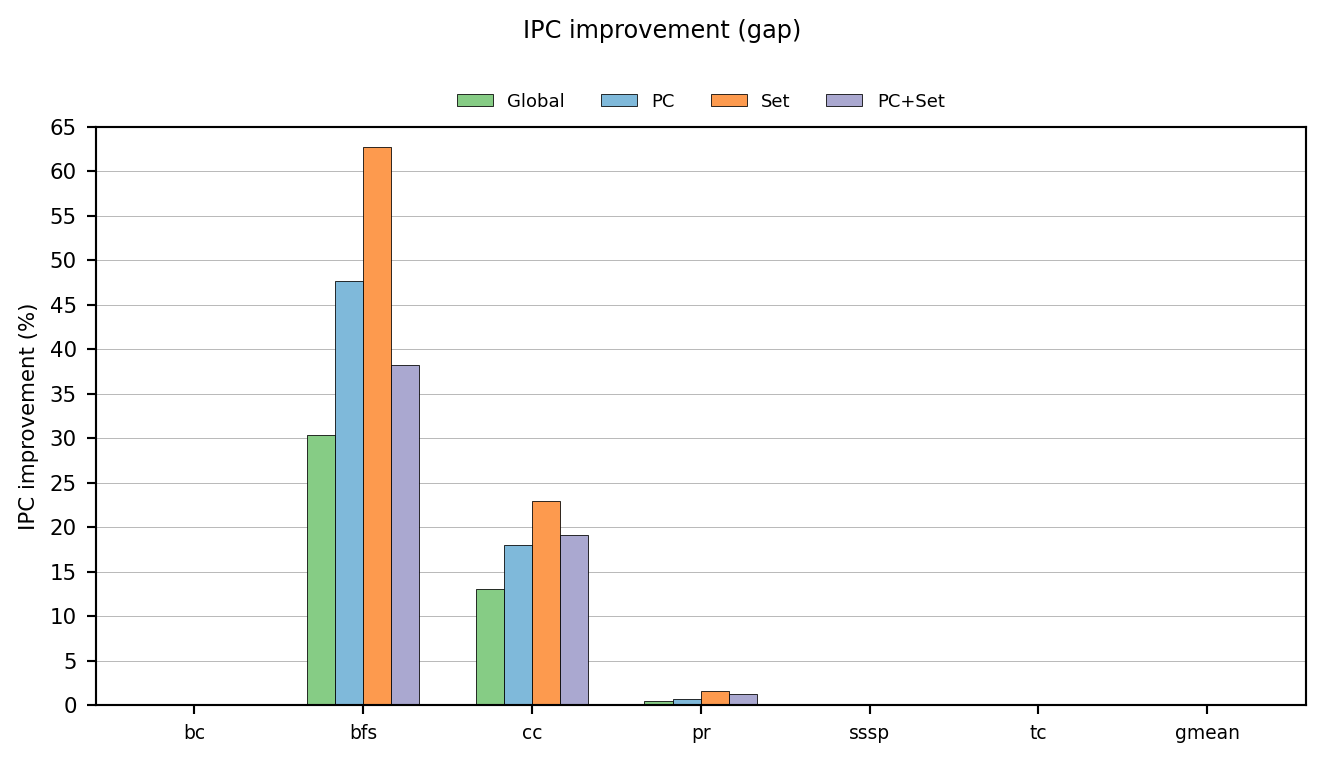

In [61]:
plot.plot_benchmark_statistic(
    stream_nocold_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=stream_nocold_colors,
    hatches=stream_nocold_hatches,
    legend_kwargs=stream_nocold_legend_kwargs,
    label_kwargs=stream_nocold_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (gap)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 65),
    ytick_distance=5,
    dpi=192, figsize=(7, 4))
plt.savefig("temporal_oracle/access_nocold/ipc_improvement__gap.png", dpi=dpi, bbox_inches="tight")

##### google

In [39]:
plot.get_benchmark_table(stream_nocold_df, "google", "cpu.gmean.ipc_improvement", add_mean=True)

,charlie,delta,merced,whiskey,gmean
Global,3.180609,4.601709,5.938444,6.561960,5.062605
PC,8.825648,8.323761,2.509481,11.225542,7.672771
Set,4.397719,8.752465,9.438426,13.353061,8.938980
PC+Set,-1.569559,-1.574093,-0.079516,-1.997729,-1.307902


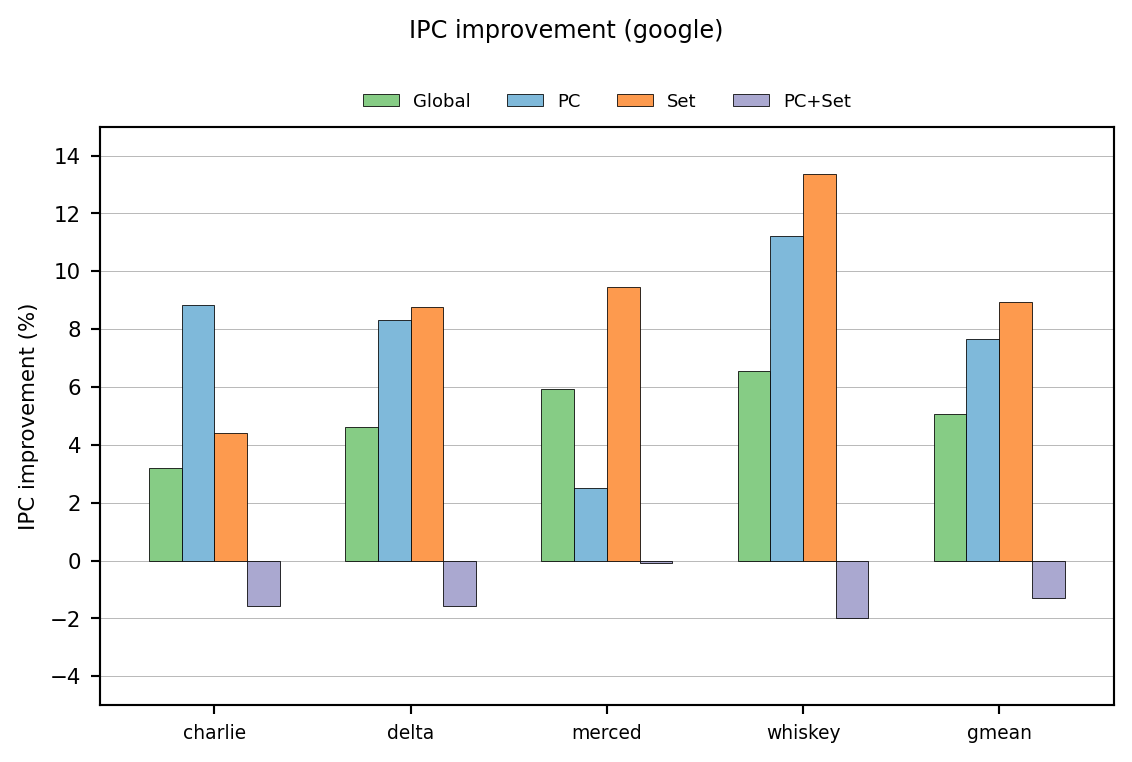

In [40]:
plot.plot_benchmark_statistic(
    stream_nocold_df, "google", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=stream_nocold_colors,
    hatches=stream_nocold_hatches,
    legend_kwargs=stream_nocold_legend_kwargs,
    label_kwargs=stream_nocold_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (google)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-5, 15),
    ytick_distance=2,
    dpi=192, figsize=(6, 4))
plt.savefig("temporal_oracle/access_nocold/ipc_improvement__google.png", dpi=dpi, bbox_inches="tight")

## Miss, no cold misses

In [75]:
stream_miss_nocold_df = {
    # Single global stream
    "Global": studies["temporal_oracle"]["temporal_oracle_global_cache_miss_nocold_1"],
    # PC-localized stream
    "PC": studies["temporal_oracle"]["temporal_oracle_pc_cache_miss_nocold_1"],
    # Set-localized stream
    "Set": studies["temporal_oracle"]["temporal_oracle_global_set_miss_nocold_1"],
    # PC+Set-localized stream
    "PC+Set": studies["temporal_oracle"]["temporal_oracle_pc_set_miss_nocold_1"],
}

stream_miss_nocold_colors = defaultdict(lambda: None, {
    "Global": colormaps["Greens"](0.45),
    "PC": colormaps["Blues"](0.45),
    "Set": colormaps["Oranges"](0.45),
    "PC+Set": colormaps["Purples"](0.45),
    "Perfect": colormaps["Reds"](0.45),
})

stream_miss_nocold_hatches = defaultdict(lambda: None, {})
stream_miss_nocold_legend_kwargs = {
    "ncol": 4,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
stream_miss_nocold_label_kwargs = {
    "rotation": 0,
    "ha": "center",
    "fontsize": 7,
}

#### IPC improvement

In [76]:
plot.get_suite_table(
    stream_miss_nocold_df, "cpu.gmean.ipc_improvement",
    suites=suites, add_mean=True)

,spec06,spec17,gap,google,gmean
Global,15.402493,8.119524,15.990740,6.126505,11.324723
PC,32.779864,15.448129,20.899136,7.611826,18.836699
Set,34.493766,12.903281,24.120732,5.385455,18.715775
PC+Set,7.807278,3.288838,16.654053,-1.725114,6.294541


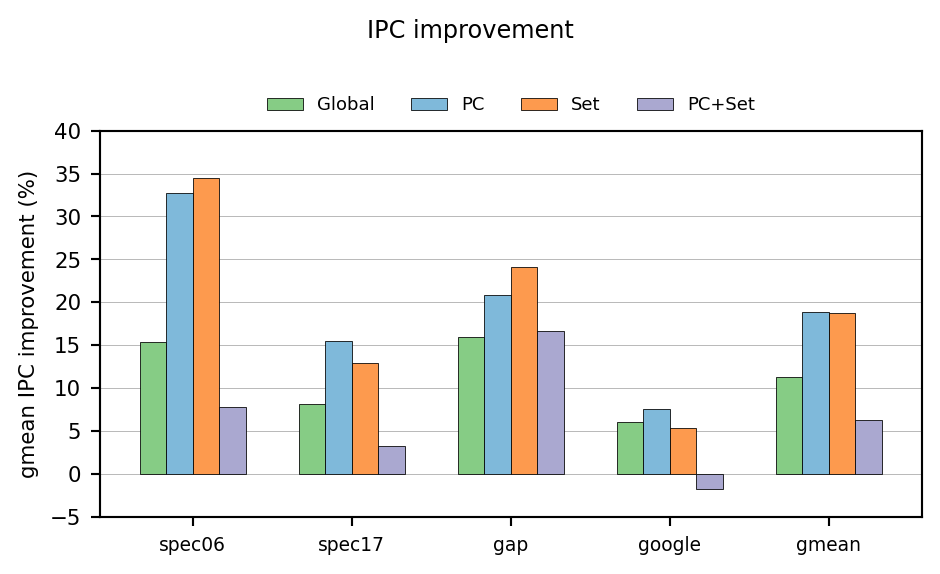

In [77]:
plot.plot_suite_statistic(
    stream_miss_nocold_df, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=stream_miss_nocold_colors,
    hatches=stream_miss_nocold_hatches,
    legend_kwargs=stream_miss_nocold_legend_kwargs,
    label_kwargs=stream_miss_nocold_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement",
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    ylim=(-5, 40),
    ytick_distance=5,
    dpi=192, figsize=(5, 3))
plt.savefig("temporal_oracle/miss_nocold/ipc_improvement.png", dpi=dpi, bbox_inches="tight")

##### spec06

In [78]:
plot.get_benchmark_table(stream_miss_nocold_df, "spec06", "cpu.gmean.ipc_improvement", add_mean=True)

[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix tonto_2049B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix wrf_1212B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix hmmer_546B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix GemsFDTD_109B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix perlbench_105B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle

,GemsFDTD,astar,bwaves,bzip2,cactusADM,calculix,gcc,gobmk,gromacs,h264ref,...,milc,omnetpp,perlbench,soplex,sphinx3,tonto,wrf,xalancbmk,zeusmp,gmean
Global,NaN,12.269826,NaN,NaN,NaN,NaN,14.070854,NaN,NaN,NaN,...,NaN,17.794900,NaN,14.429132,15.752387,NaN,NaN,9.213567,NaN,NaN
PC,NaN,17.189955,NaN,NaN,NaN,NaN,24.214281,NaN,NaN,NaN,...,NaN,49.531121,NaN,35.623945,40.899299,NaN,NaN,21.766236,NaN,NaN
Set,NaN,17.402326,NaN,NaN,NaN,NaN,31.335945,NaN,NaN,NaN,...,NaN,28.574765,NaN,38.467972,47.716751,NaN,NaN,19.479489,NaN,NaN
PC+Set,NaN,18.085629,NaN,NaN,NaN,NaN,12.957500,NaN,NaN,NaN,...,NaN,-12.440143,NaN,6.461379,5.261154,NaN,NaN,-3.123140,NaN,NaN


[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix tonto_2049B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix wrf_1212B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix hmmer_546B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix GemsFDTD_109B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix perlbench_105B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle

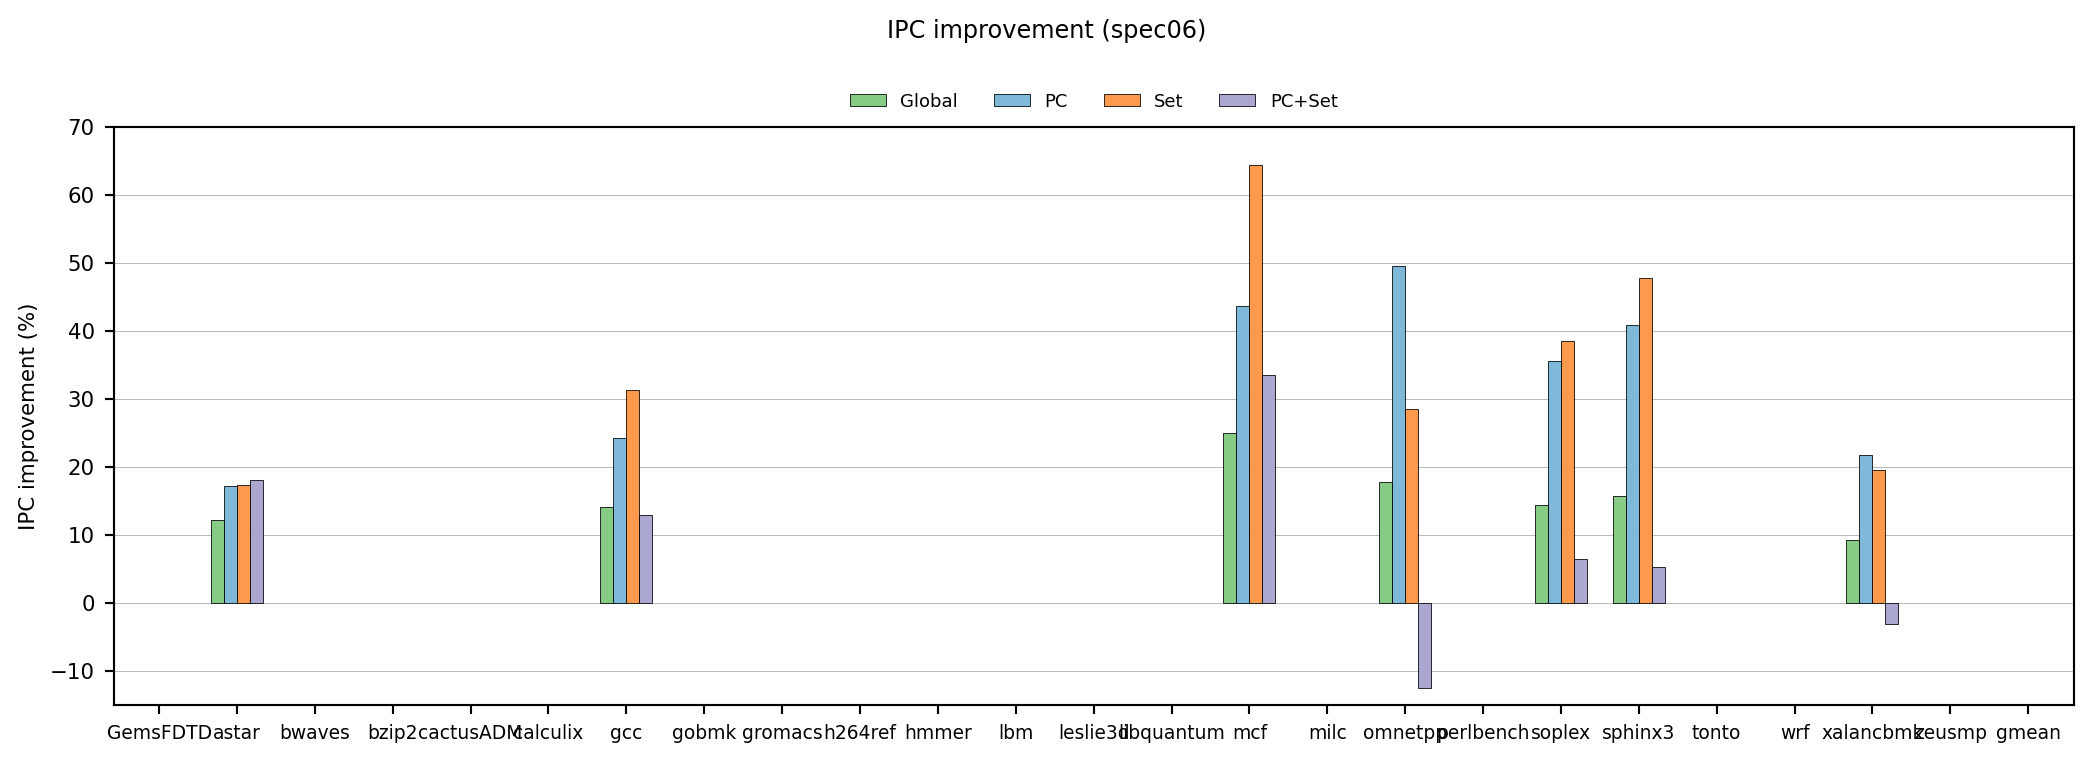

In [79]:
plot.plot_benchmark_statistic(
    stream_miss_nocold_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=stream_miss_nocold_colors,
    hatches=stream_miss_nocold_hatches,
    legend_kwargs=stream_miss_nocold_legend_kwargs,
    label_kwargs=stream_miss_nocold_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec06)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-15, 70),
    ytick_distance=10,
    dpi=192, figsize=(11, 4))
plt.savefig("temporal_oracle/miss_nocold/ipc_improvement__spec06.png", dpi=dpi, bbox_inches="tight")

##### spec17

In [80]:
plot.get_benchmark_table(stream_miss_nocold_df, "spec17", "cpu.gmean.ipc_improvement", add_mean=True)

[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix 649.fotonik3d_s-1176B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix 638.imagick_s-4128B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix 603.bwaves_s-2931B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix 627.cam4_s-490B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix 628.pop2_s-17B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNI

,600.perlbench,602.gcc,603.bwaves,605.mcf,607.cactuBSSN,619.lbm,620.omnetpp,621.wrf,623.xalancbmk,625.x264,627.cam4,628.pop2,631.deepsjeng,638.imagick,641.leela,644.nab,649.fotonik3d,654.roms,657.xz,gmean
Global,NaN,25.151200,NaN,8.295128,0.909550,NaN,16.363630,1.968365,4.723414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.630994,NaN,NaN
PC,NaN,26.317496,NaN,17.081436,3.971928,NaN,40.259292,3.709085,11.657006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.447595,NaN,NaN
Set,NaN,30.232715,NaN,10.793264,4.247307,NaN,30.306632,3.916497,10.498602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.905815,NaN,NaN
PC+Set,NaN,25.313370,NaN,14.732199,-10.184746,NaN,-8.182100,-0.745169,2.035205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.450818,NaN,NaN


[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix 649.fotonik3d_s-1176B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix 638.imagick_s-4128B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix 603.bwaves_s-2931B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix 627.cam4_s-490B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix 628.pop2_s-17B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNI

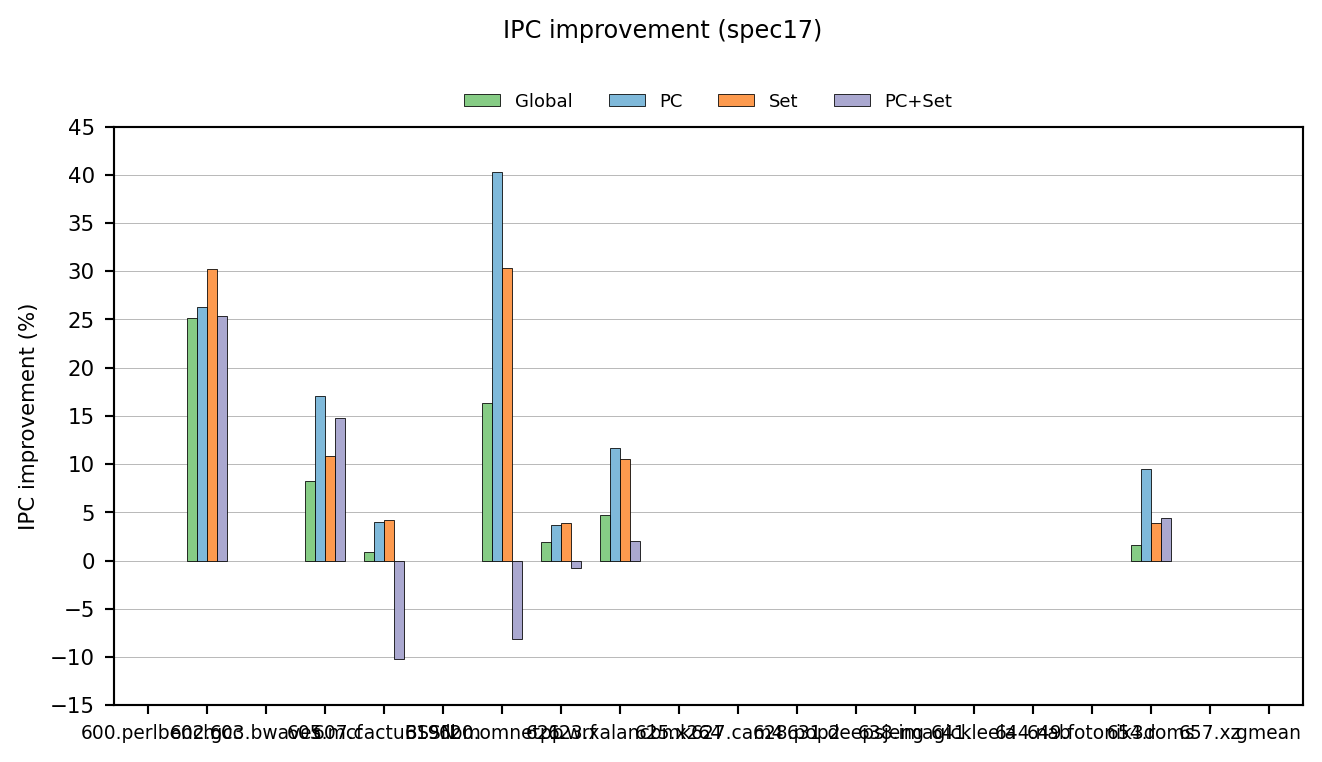

In [81]:
plot.plot_benchmark_statistic(
    stream_miss_nocold_df, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=stream_miss_nocold_colors,
    hatches=stream_miss_nocold_hatches,
    legend_kwargs=stream_miss_nocold_legend_kwargs,
    label_kwargs=stream_miss_nocold_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec17)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-15, 45),
    ytick_distance=5,
    dpi=192, figsize=(7, 4))
plt.savefig("temporal_oracle/miss_nocold/ipc_improvement__spec17.png", dpi=dpi, bbox_inches="tight")

##### gap

In [82]:
plot.get_benchmark_table(stream_miss_nocold_df, "gap", "cpu.gmean.ipc_improvement", add_mean=True)

[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix tc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix bc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix sssp: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_pc_cache_miss_nocold_1, mix tc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_pc_cache_miss_nocold_1, mix bc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_pc_cache_miss_nocold_1, mix sssp: Missing results fo

,bc,bfs,cc,pr,sssp,tc,gmean
Global,NaN,31.972432,17.523223,0.615073,NaN,NaN,NaN
PC,NaN,47.217784,18.498698,1.296802,NaN,NaN,NaN
Set,NaN,55.127849,21.677599,1.305399,NaN,NaN,NaN
PC+Set,NaN,34.154564,18.131850,0.167547,NaN,NaN,NaN


[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix tc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix bc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_global_cache_miss_nocold_1, mix sssp: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_pc_cache_miss_nocold_1, mix tc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_pc_cache_miss_nocold_1, mix bc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment temporal_oracle_pc_cache_miss_nocold_1, mix sssp: Missing results fo

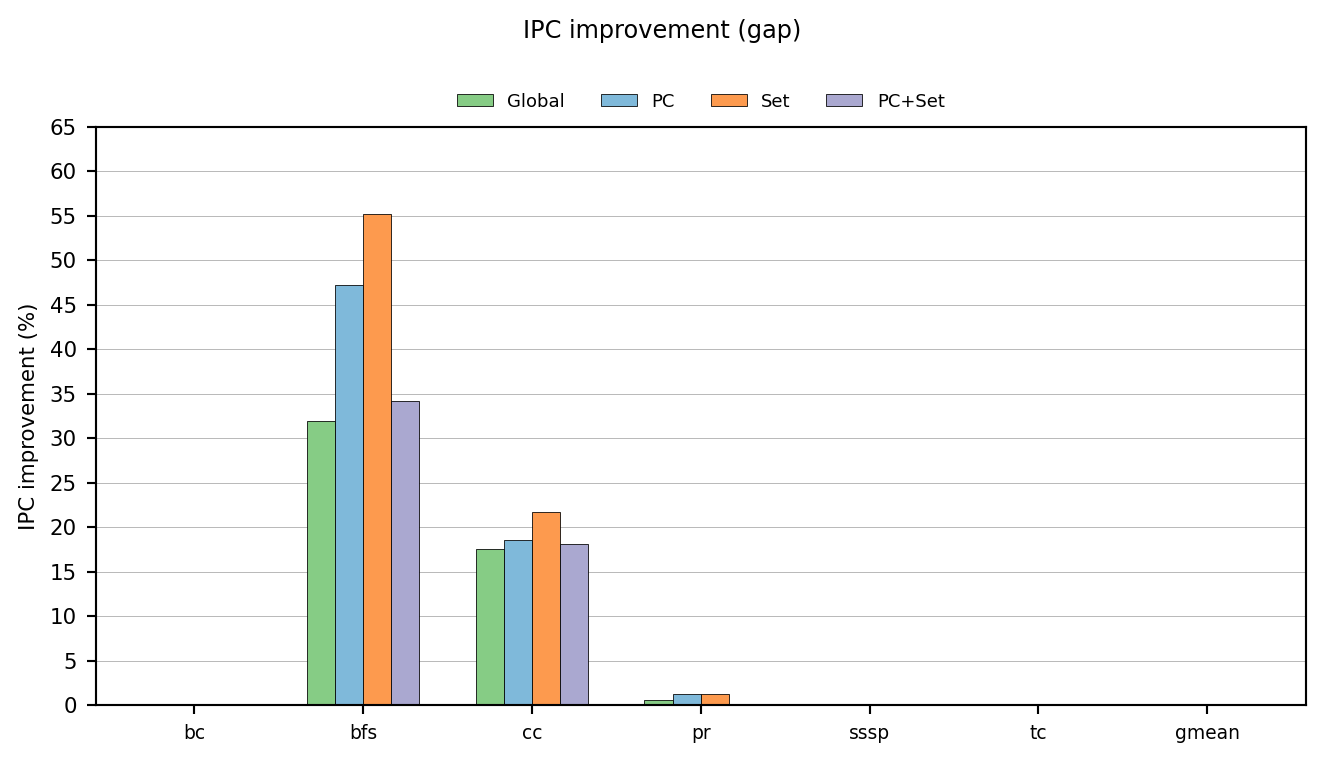

In [83]:
plot.plot_benchmark_statistic(
    stream_miss_nocold_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=stream_miss_nocold_colors,
    hatches=stream_miss_nocold_hatches,
    legend_kwargs=stream_miss_nocold_legend_kwargs,
    label_kwargs=stream_miss_nocold_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (gap)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 65),
    ytick_distance=5,
    dpi=192, figsize=(7, 4))
plt.savefig("temporal_oracle/miss_nocold/ipc_improvement__gap.png", dpi=dpi, bbox_inches="tight")

##### google

In [84]:
plot.get_benchmark_table(stream_miss_nocold_df, "google", "cpu.gmean.ipc_improvement", add_mean=True)

,charlie,delta,merced,whiskey,gmean
Global,3.854184,5.872185,6.769826,8.054047,6.126505
PC,8.915134,7.927644,2.372287,11.438864,7.611826
Set,2.898166,3.781086,6.866146,8.082831,5.385455
PC+Set,-1.582363,-2.702194,-0.077140,-2.516893,-1.725114


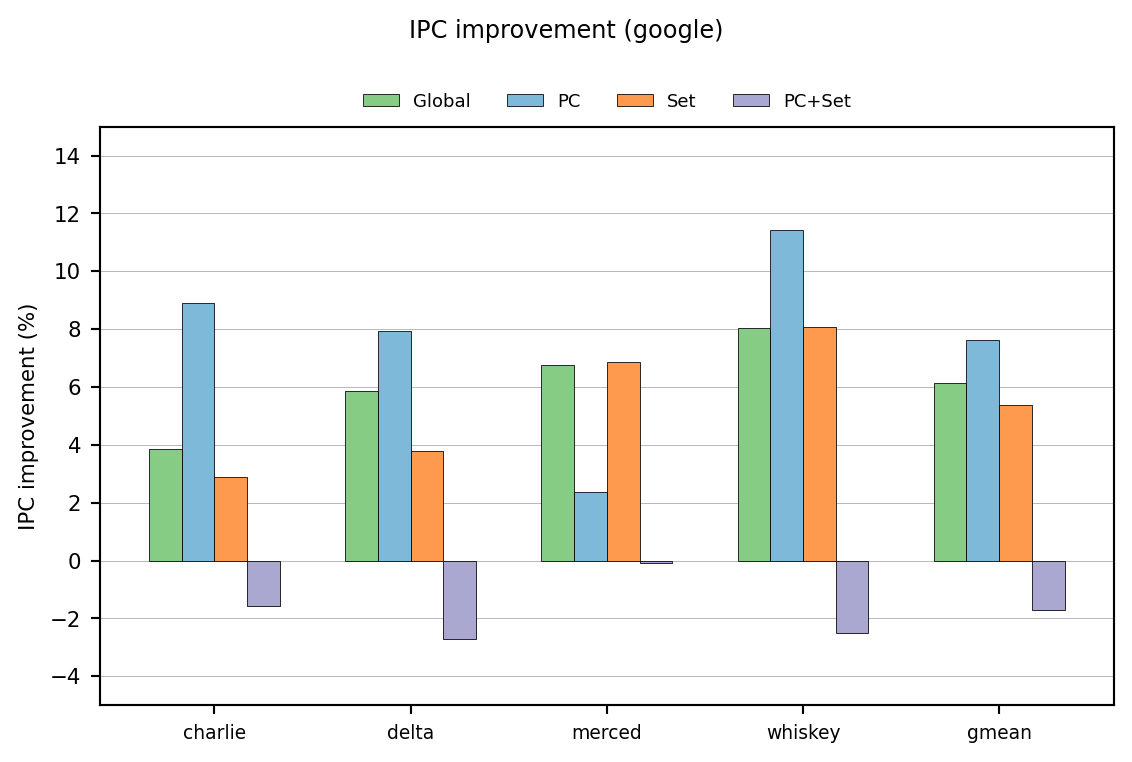

In [85]:
plot.plot_benchmark_statistic(
    stream_miss_nocold_df, "google", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=stream_miss_nocold_colors,
    hatches=stream_miss_nocold_hatches,
    legend_kwargs=stream_miss_nocold_legend_kwargs,
    label_kwargs=stream_miss_nocold_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (google)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-5, 15),
    ytick_distance=2,
    dpi=192, figsize=(6, 4))
plt.savefig("temporal_oracle/miss_nocold/ipc_improvement__google.png", dpi=dpi, bbox_inches="tight")

# Perfect

In [86]:
perfect_df = {
    "Perfect": studies["perfect"]["llc_perfect"],
    "Perfect (except cold misses)": studies["perfect"]["llc_perfect_nocold"],
}

perfect_colors = defaultdict(lambda: None, {
    "Perfect": colormaps["Reds"](0.45),
    "Perfect (except cold misses)": colormaps["Reds"](0.7),
})

perfect_hatches = defaultdict(lambda: None, {})
perfect_legend_kwargs = {
    "ncol": 2,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
perfect_label_kwargs = {
    "rotation": 0,
    "ha": "center",
    "fontsize": 7,
}

### IPC improvement

In [87]:
plot.get_suite_table(
    perfect_df, "cpu.gmean.ipc_improvement",
    suites=suites, add_mean=True)

,spec06,spec17,gap,google,gmean
Perfect,111.692065,57.129323,32.817452,107.415662,73.986130
Perfect (except cold misses),83.352076,33.969074,31.479589,23.466163,41.310414


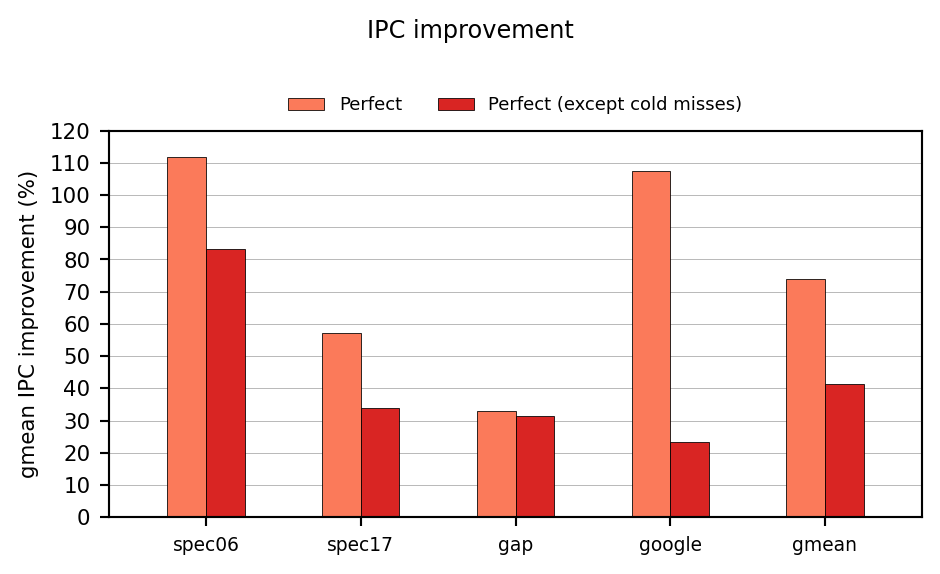

In [88]:
plot.plot_suite_statistic(
    perfect_df, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=perfect_colors,
    hatches=perfect_hatches,
    legend_kwargs=perfect_legend_kwargs,
    label_kwargs=perfect_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement",
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    ylim=(0, 120),
    ytick_distance=10,
    dpi=192, figsize=(5, 3))
plt.savefig("perfect/ipc_improvement.png", dpi=dpi, bbox_inches="tight")

#### spec06

In [89]:
plot.get_benchmark_table(perfect_df, "spec06", "cpu.gmean.ipc_improvement", add_mean=True)

[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix tonto_2049B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix wrf_1212B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix hmmer_546B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix GemsFDTD_109B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix perlbench_105B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix calculix_2655B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect,

,GemsFDTD,astar,bwaves,bzip2,cactusADM,calculix,gcc,gobmk,gromacs,h264ref,...,milc,omnetpp,perlbench,soplex,sphinx3,tonto,wrf,xalancbmk,zeusmp,gmean
Perfect,NaN,49.855301,NaN,NaN,NaN,NaN,67.125877,NaN,NaN,NaN,...,NaN,140.553044,NaN,196.212761,117.268192,NaN,NaN,41.724323,NaN,NaN
Perfect (except cold misses),NaN,43.169508,NaN,NaN,NaN,NaN,41.265984,NaN,NaN,NaN,...,NaN,130.001319,NaN,179.613399,109.749782,NaN,NaN,30.321895,NaN,NaN


[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix tonto_2049B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix wrf_1212B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix hmmer_546B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix GemsFDTD_109B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix perlbench_105B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix calculix_2655B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect,

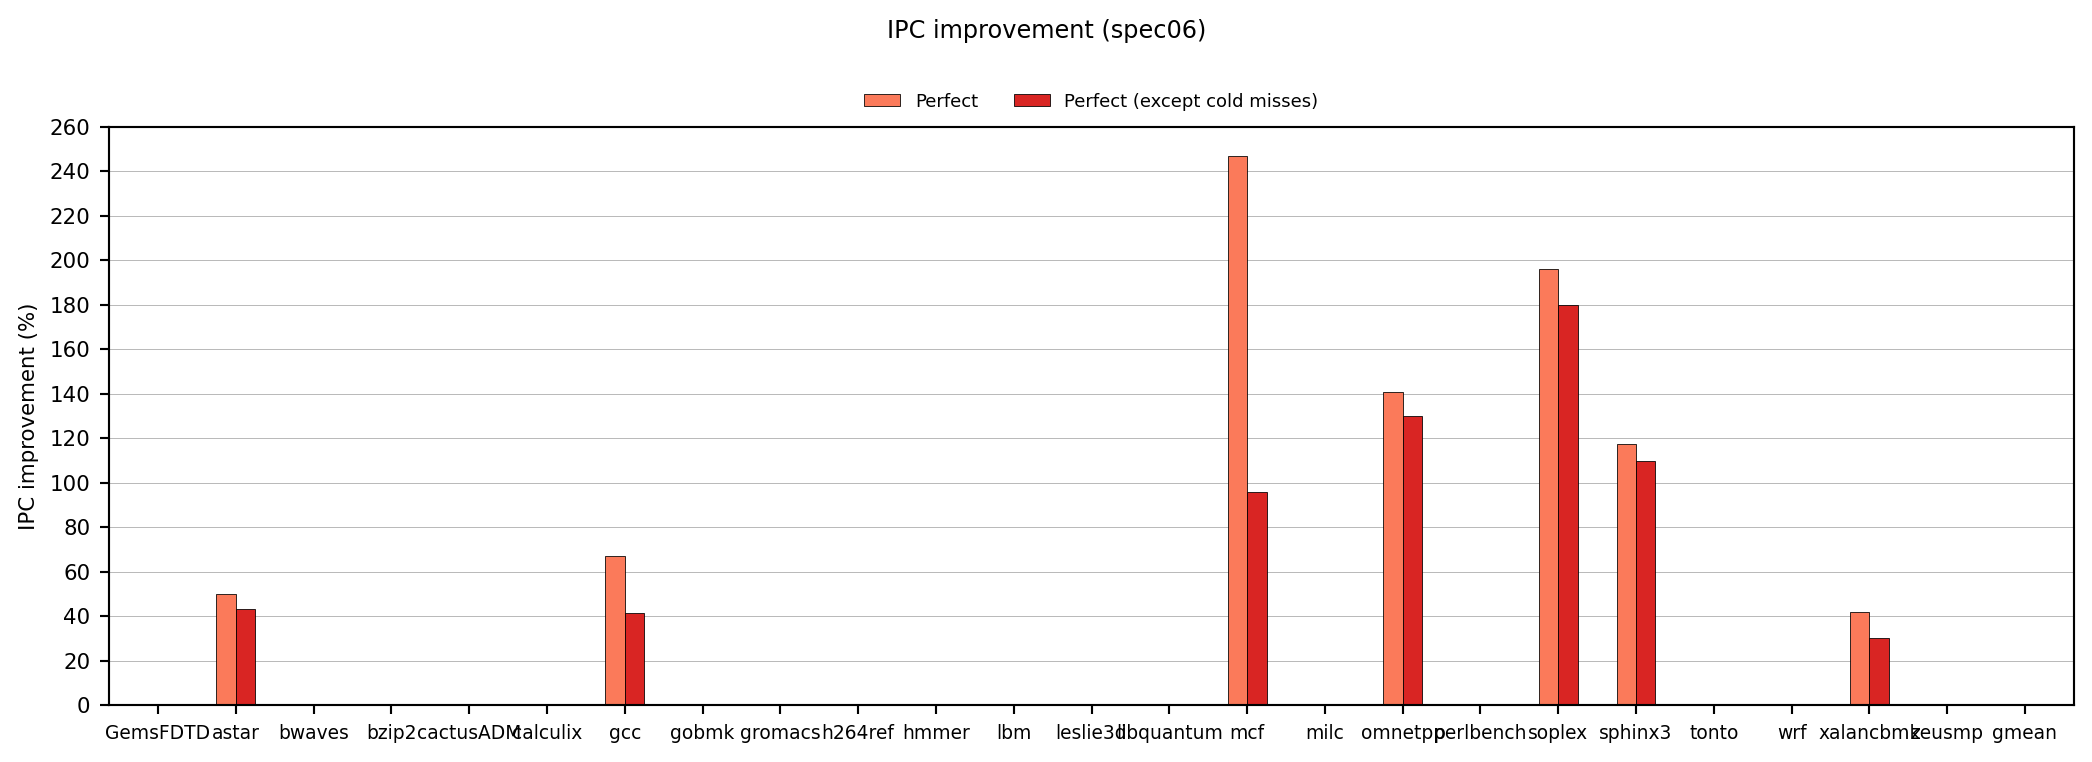

In [90]:
plot.plot_benchmark_statistic(
    perfect_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=perfect_colors,
    hatches=perfect_hatches,
    legend_kwargs=perfect_legend_kwargs,
    label_kwargs=perfect_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec06)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 260),
    ytick_distance=20,
    dpi=192, figsize=(11, 4))
plt.savefig("perfect/ipc_improvement__spec06.png", dpi=dpi, bbox_inches="tight")

#### spec17

In [91]:
plot.get_benchmark_table(perfect_df, "spec17", "cpu.gmean.ipc_improvement", add_mean=True)

[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix 649.fotonik3d_s-1176B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix 638.imagick_s-4128B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix 603.bwaves_s-2931B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix 627.cam4_s-490B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix 628.pop2_s-17B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix 657.xz_s-56B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARN

,600.perlbench,602.gcc,603.bwaves,605.mcf,607.cactuBSSN,619.lbm,620.omnetpp,621.wrf,623.xalancbmk,625.x264,627.cam4,628.pop2,631.deepsjeng,638.imagick,641.leela,644.nab,649.fotonik3d,654.roms,657.xz,gmean
Perfect,NaN,52.803450,NaN,75.494078,68.567105,NaN,91.365640,27.168860,16.176677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.041244,NaN,NaN
Perfect (except cold misses),NaN,37.045392,NaN,44.749749,18.331709,NaN,78.422493,10.513547,14.287529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.414649,NaN,NaN


[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix 649.fotonik3d_s-1176B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix 638.imagick_s-4128B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix 603.bwaves_s-2931B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix 627.cam4_s-490B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix 628.pop2_s-17B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix 657.xz_s-56B: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARN

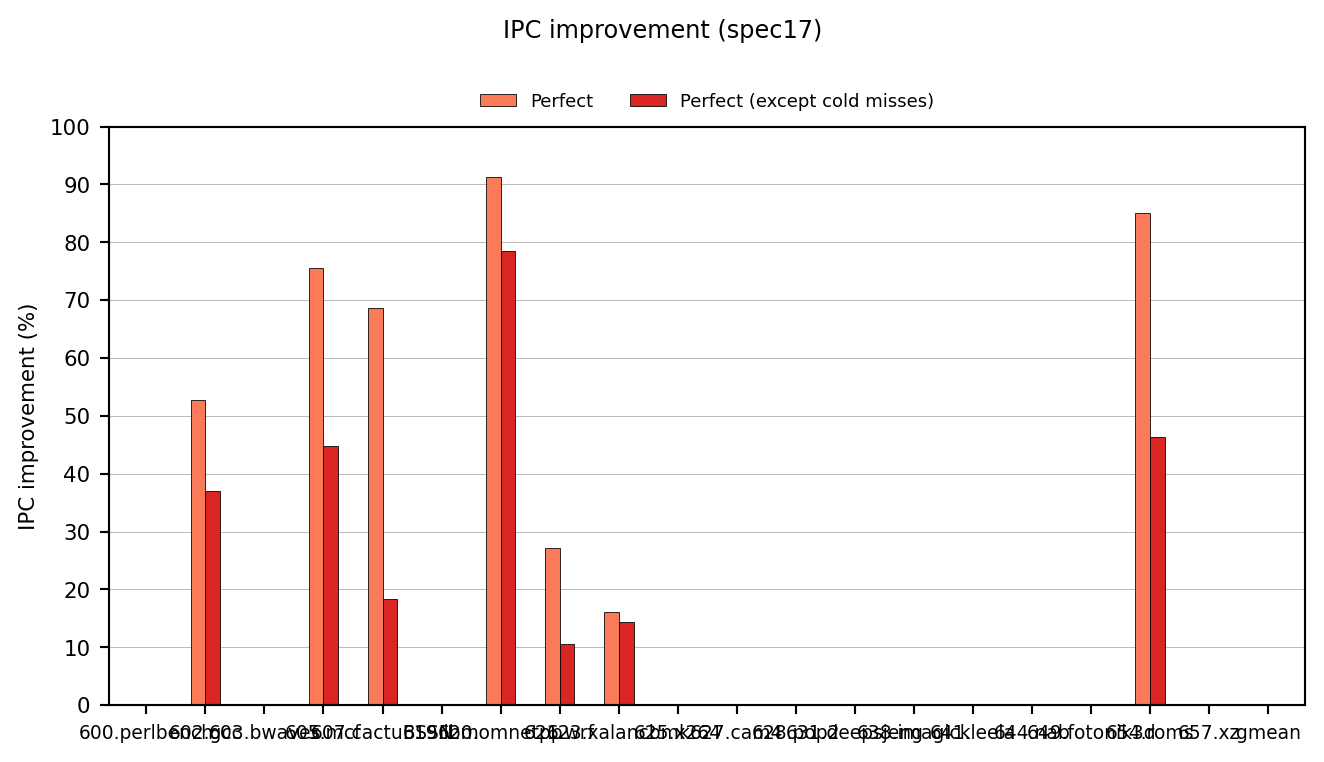

In [92]:
plot.plot_benchmark_statistic(
    perfect_df, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=perfect_colors,
    hatches=perfect_hatches,
    legend_kwargs=perfect_legend_kwargs,
    label_kwargs=perfect_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec17)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(7, 4))
plt.savefig("perfect/ipc_improvement__spec17.png", dpi=dpi, bbox_inches="tight")

#### gap

In [93]:
plot.get_benchmark_table(perfect_df, "gap", "cpu.gmean.ipc_improvement", add_mean=True)

[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix tc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix bc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix sssp: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect_nocold, mix tc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect_nocold, mix bc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect_nocold, mix sssp: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan


,bc,bfs,cc,pr,sssp,tc,gmean
Perfect,NaN,73.993610,31.132647,2.688380,NaN,NaN,NaN
Perfect (except cold misses),NaN,70.296414,30.322064,2.412169,NaN,NaN,NaN


[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix tc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix bc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect, mix sssp: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect_nocold, mix tc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect_nocold, mix bc: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan
[ipykernel_launcher][angrist-3] [WARNING] Experiment llc_perfect_nocold, mix sssp: Missing results for stat cpu.gmean.ipc_improvement, filling with np.nan


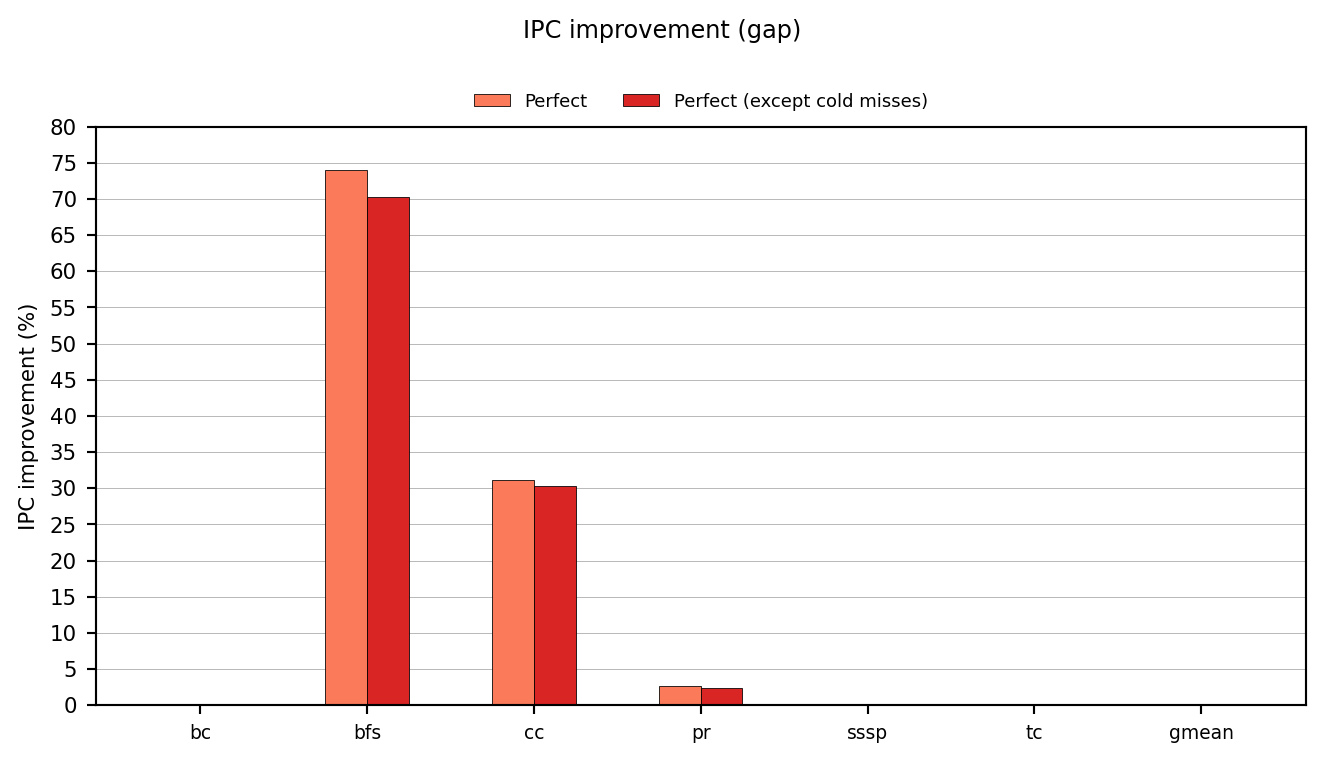

In [94]:
plot.plot_benchmark_statistic(
    perfect_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=perfect_colors,
    hatches=perfect_hatches,
    legend_kwargs=perfect_legend_kwargs,
    label_kwargs=perfect_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (gap)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 80),
    ytick_distance=5,
    dpi=192, figsize=(7, 4))
plt.savefig("perfect/ipc_improvement__gap.png", dpi=dpi, bbox_inches="tight")

#### cloudsuite

In [95]:
plot.get_benchmark_table(perfect_df, "google", "cpu.gmean.ipc_improvement", add_mean=True)

,charlie,delta,merced,whiskey,gmean
Perfect,110.685438,135.868451,71.486894,117.185528,107.415662
Perfect (except cold misses),10.250568,20.518509,21.073036,44.447421,23.466163


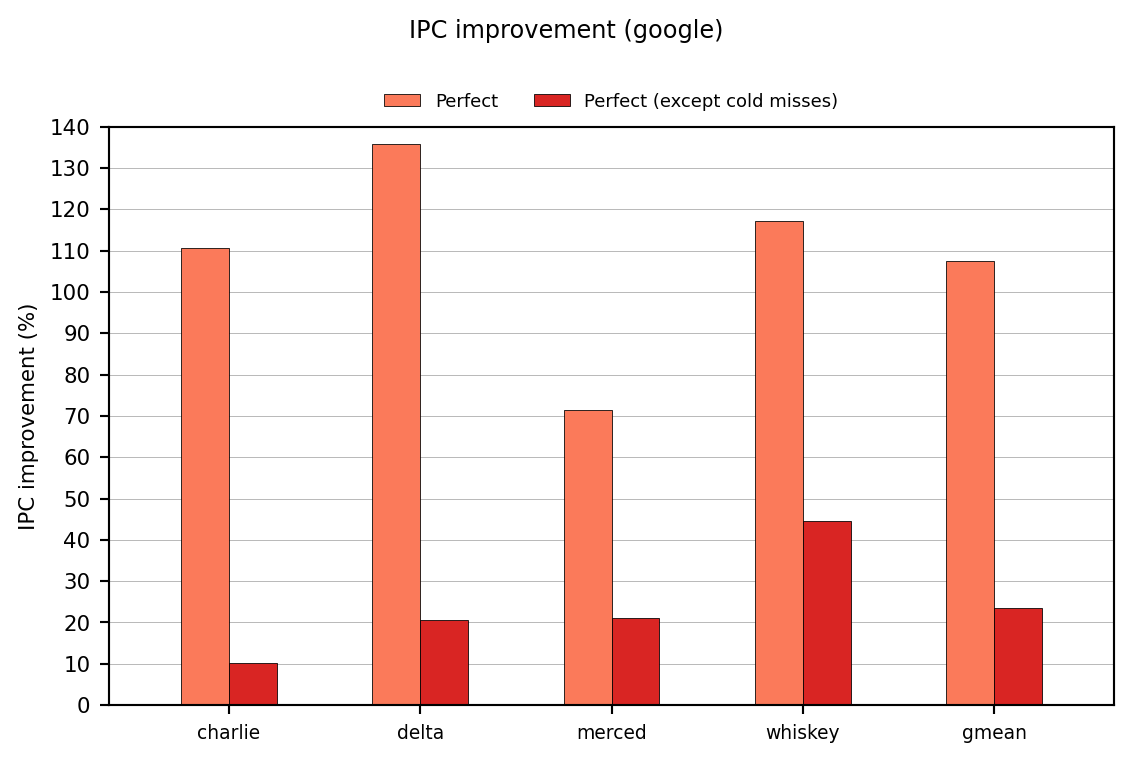

In [96]:
plot.plot_benchmark_statistic(
    perfect_df, "google", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=perfect_colors,
    hatches=perfect_hatches,
    legend_kwargs=perfect_legend_kwargs,
    label_kwargs=perfect_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (google)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 140),
    ytick_distance=10,
    dpi=192, figsize=(6, 4))
plt.savefig("perfect/ipc_improvement__google.png", dpi=dpi, bbox_inches="tight")